In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from outside_vars import *
from plotters import *

df = pd.read_csv('data.csv')
df = fill_hc_nan_values(df) # GENERATING VALUES I DONT HAVE
df['group'] = df['group'].str.extract(r'([A-Za-z]+)')
df_numeric = df.drop(columns=['group'])
full_column_names = [column_map.get(col, col) for col in df_numeric.columns]
display(df)

,group,age,MoCA,UPDRS_III,ha_rt,ha_err,va_rt,va_err,hpr_rt,hpr_avgv,...,hpl_maxv,hpl_gain,vpu_rt,vpu_avgv,vpu_maxv,vpu_gain,vpd_rt,vpd_avgv,vpd_maxv,vpd_gain
0,PD,58.49,24.000000,40.000000,329.781250,3.125000,392.000000,33.333333,269.900000,284.034000,...,454.192500,0.892500,290.000000,139.637500,506.936000,1.006875,277.062500,56.678125,197.205625,1.010000
1,PD,72.79,30.000000,18.000000,264.290323,64.516129,249.814815,70.370370,185.416667,235.810833,...,359.972727,0.840909,189.615385,200.039333,482.352857,1.022000,249.733333,179.216667,403.485333,1.130667
2,PD,71.18,20.000000,52.000000,218.900000,51.612903,278.344828,48.275862,167.000000,205.985000,...,351.744000,0.679000,198.857143,85.872857,221.724286,0.785000,204.000000,103.774667,264.893333,0.698000
3,PD,60.80,28.000000,24.000000,295.222222,55.555556,310.571429,71.428571,209.900000,242.385000,...,511.176250,0.831250,272.461538,102.453077,260.980000,0.733846,237.785714,70.583571,206.768571,0.971429
4,PD,59.61,26.000000,22.000000,157.161290,96.774194,183.700000,93.548387,157.700000,232.112500,...,417.408333,0.863333,164.500000,194.479000,435.523750,0.796000,172.000000,227.960000,478.098000,0.996667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,HC,60.00,30.000000,0.867979,160.820000,41.460000,150.225000,45.415000,179.500000,251.007500,...,548.362727,0.874545,185.312500,203.718125,458.505625,0.830625,148.214286,211.195000,397.655000,0.860000
94,HC,67.00,30.000000,3.539026,216.880000,56.250000,269.255000,18.750000,177.900000,219.262000,...,609.260909,0.903636,215.285714,175.128571,489.742143,0.844286,228.500000,194.237857,548.712857,1.001429
95,HC,68.00,28.601218,1.887050,258.690000,0.000000,299.810000,25.000000,257.583333,226.819167,...,582.180909,1.009091,305.200000,149.164667,416.615333,0.855333,210.733333,305.058667,769.139333,1.189333
96,HC,59.00,30.000000,1.555593,217.815000,25.000000,242.095000,15.625000,200.833333,245.976667,...,577.539167,1.032700,199.250000,237.318750,487.403125,0.844286,223.562500,265.386250,589.265000,1.189333


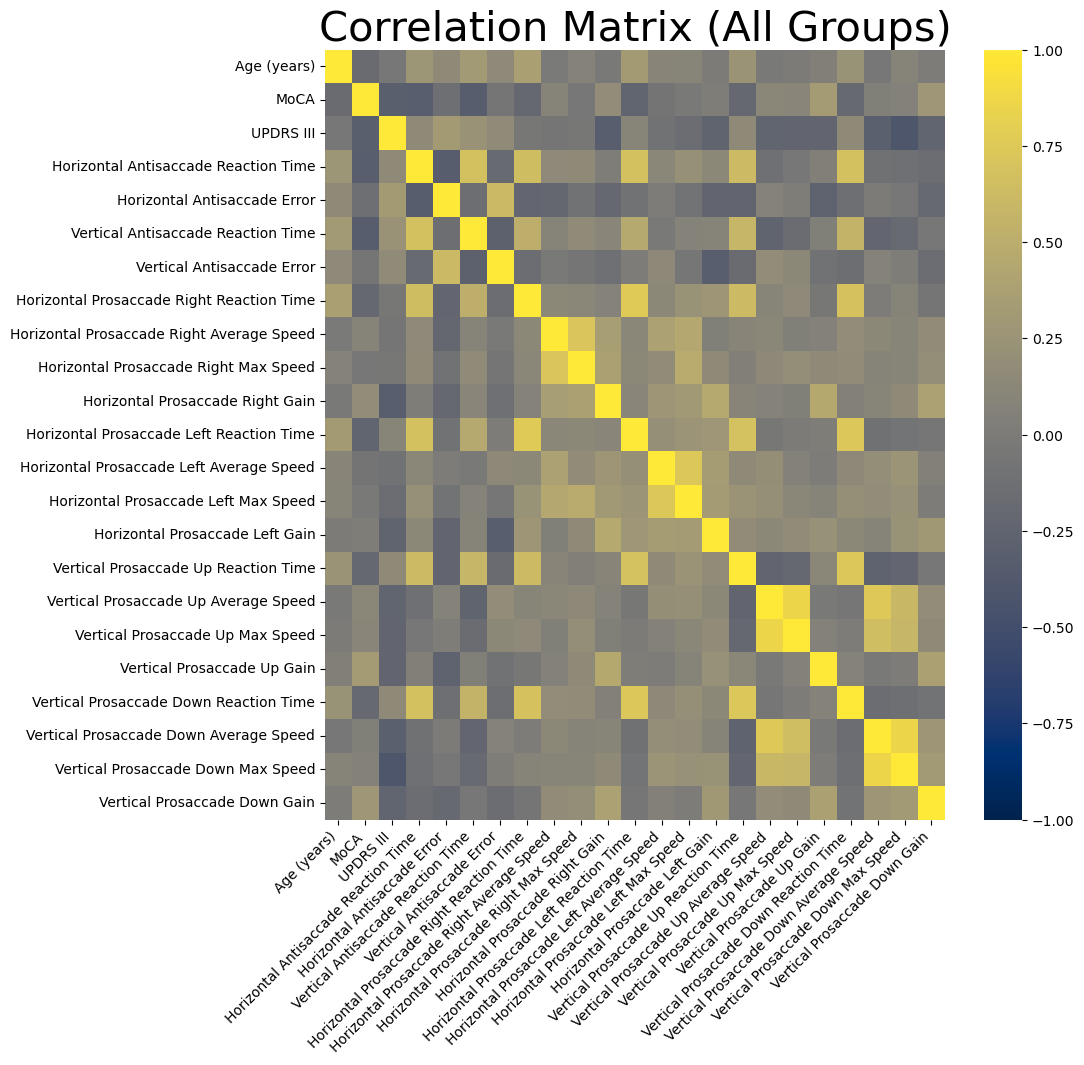

In [2]:
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap="cividis", vmin=-1, vmax=1, 
            xticklabels=full_column_names, yticklabels=full_column_names)

plt.title('Correlation Matrix (All Groups)', fontsize=30)

plt.xticks(rotation=45, ha='right')
plt.show()

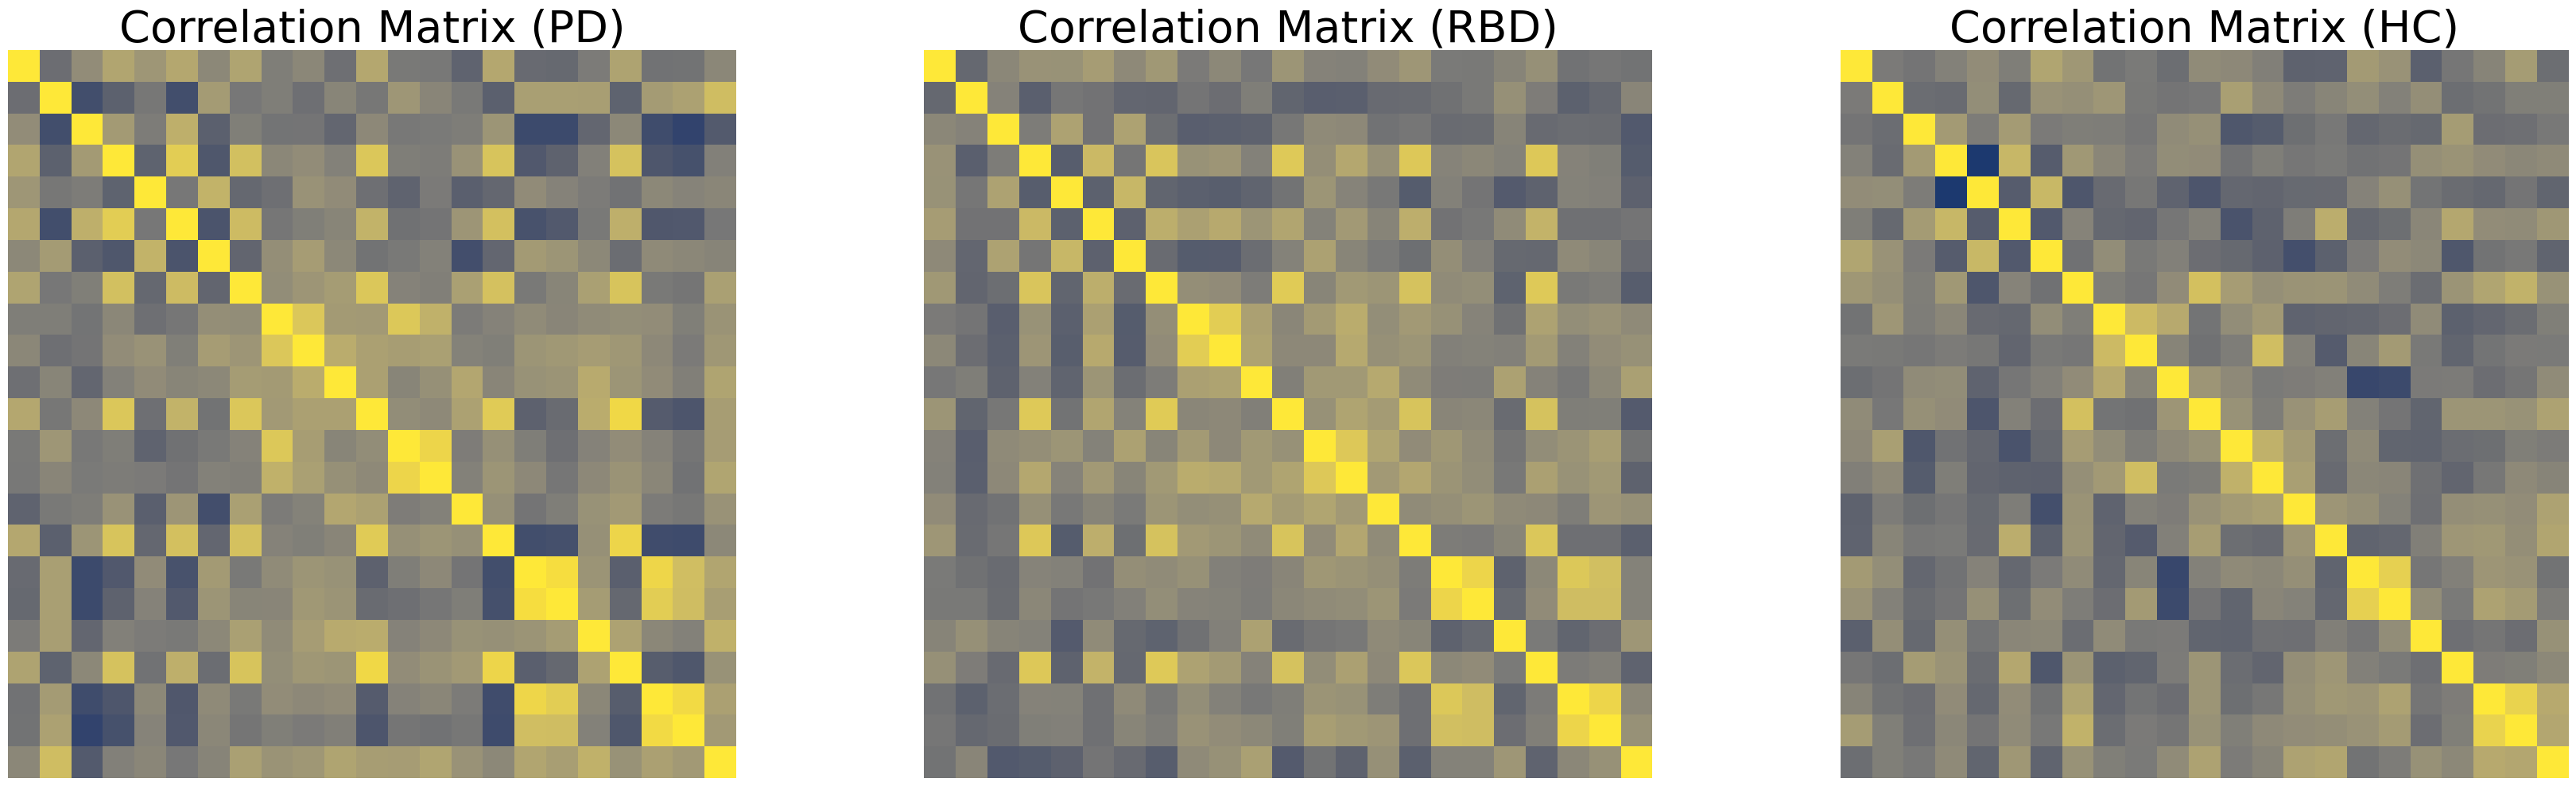

In [3]:
pd_group_data = df[df['group'].str.startswith('PD')]
rbd_group_data = df[df['group'].str.startswith('RBD')]
hc_group_data = df[df['group'].str.startswith('HC')]

groups = {'PD': pd_group_data, 'RBD': rbd_group_data, 'HC': hc_group_data}

fig, axes = plt.subplots(1, 3, figsize=(35, 10))

cbar = True
for i, (group_name, group_data) in enumerate(groups.items()):
    df_numeric = group_data.drop(columns=['group'])
    corr_matrix = df_numeric.corr()

    sns.heatmap(corr_matrix, annot=False, cmap="cividis", vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False, ax=axes[i], cbar=False)

    axes[i].set_title(f'Correlation Matrix ({group_name})', fontsize=40)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', rotation=45, labelsize=12)

    axes[i].set_aspect('equal')


plt.tight_layout()
plt.show()


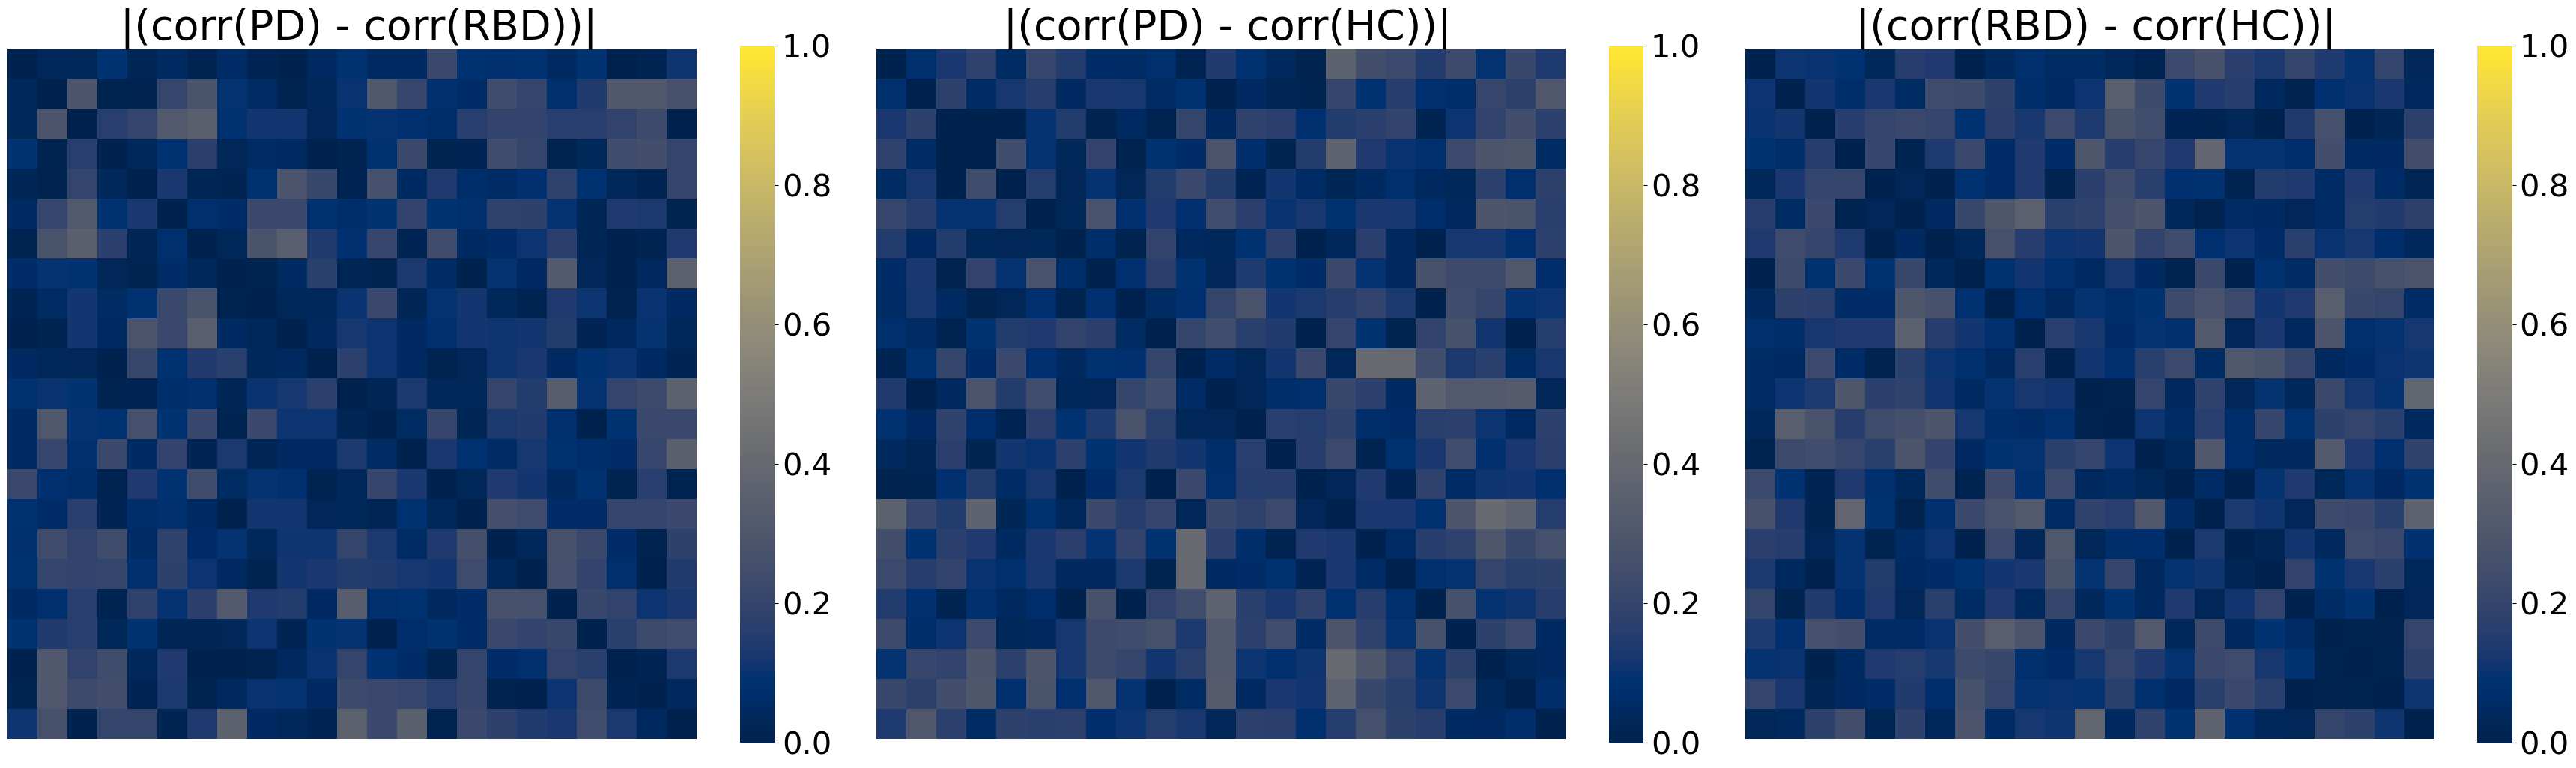

In [4]:
# correlation matrices
pd_corr = pd_group_data.drop(columns=['group']).corr()
rbd_corr = rbd_group_data.drop(columns=['group']).corr()
hc_corr = hc_group_data.drop(columns=['group']).corr()


abs_diff_matrices = {
    "corr(PD) - corr(RBD)": abs(pd_corr - rbd_corr)/2,
    "corr(PD) - corr(HC)": abs(pd_corr - hc_corr)/2,
    "corr(RBD) - corr(HC)": abs(rbd_corr - hc_corr)/2
}

# Plot the absolute differences
fig, axes = plt.subplots(1, 3, figsize=(35, 10))

for i, (title, diff_matrix) in enumerate(abs_diff_matrices.items()):
    sns.heatmap(diff_matrix, annot=False, cmap="cividis", vmin=0, vmax=1, 
                xticklabels=False, yticklabels=False, ax=axes[i], cbar=True)

    axes[i].set_title(f' |({title})|', fontsize=40)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', rotation=45, labelsize=12)
    axes[i].set_aspect('equal')
    cbar = axes[i].collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)


plt.tight_layout()
plt.show()

In [5]:
# Takes long af
#pairplot = sns.pairplot(df, hue="group", diag_kind="hist", palette={"PD": "blue", "RBD": "red", "HC": "green"})
#plt.show()

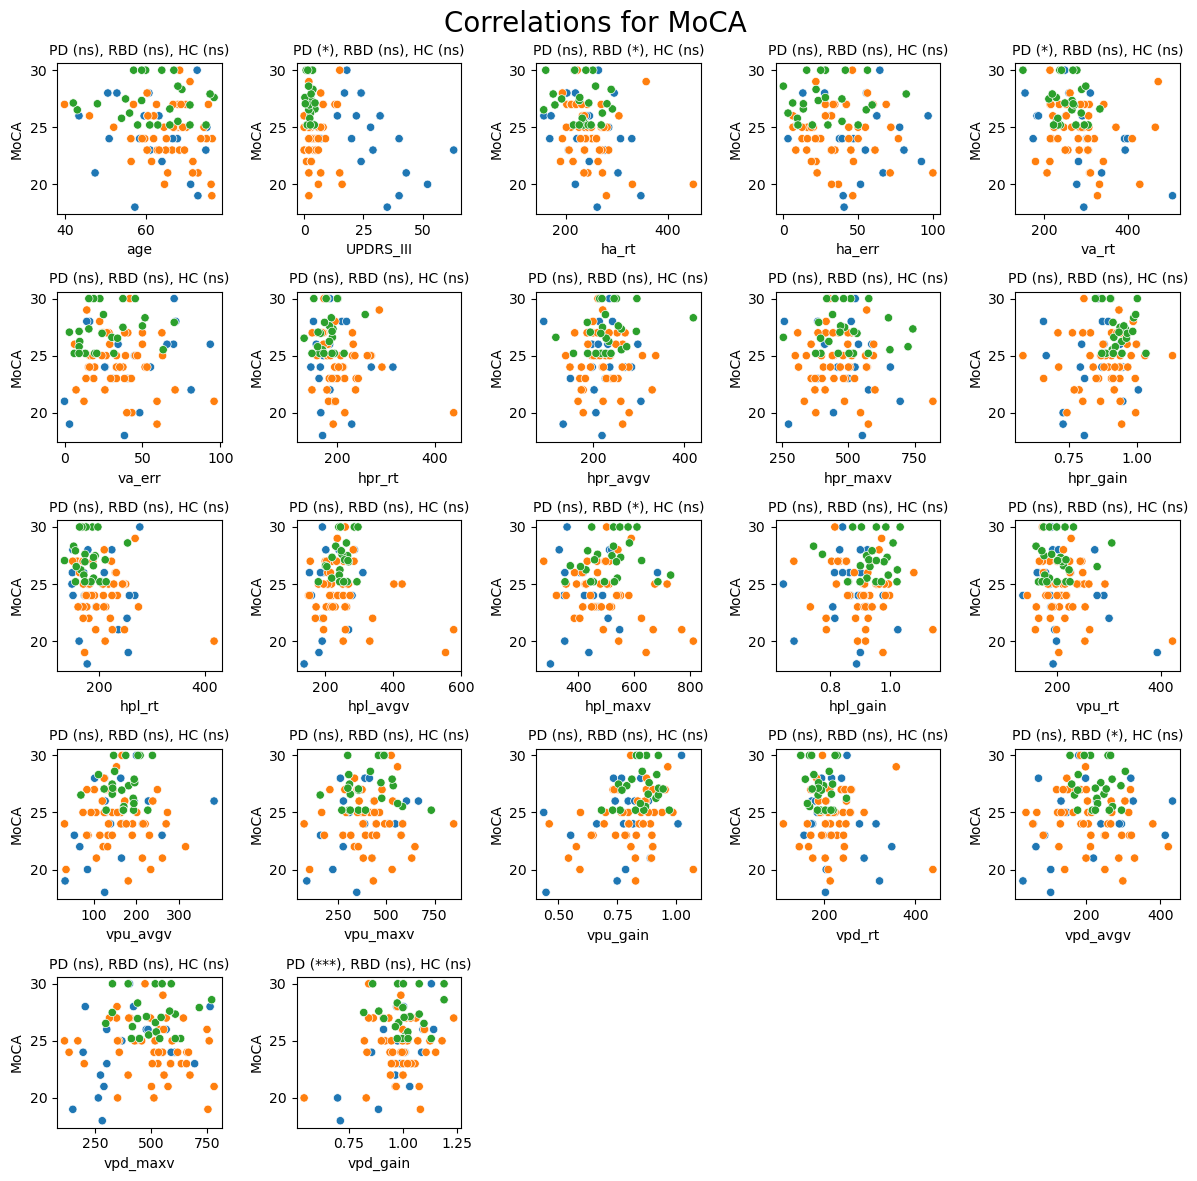

In [6]:
normality_results = mass_sw_test(df)
MoCA_r = compute_correlations(df, 'MoCA', normality_results)  # For MoCA, as example

scatter_plots(df, 'MoCA', MoCA_r)

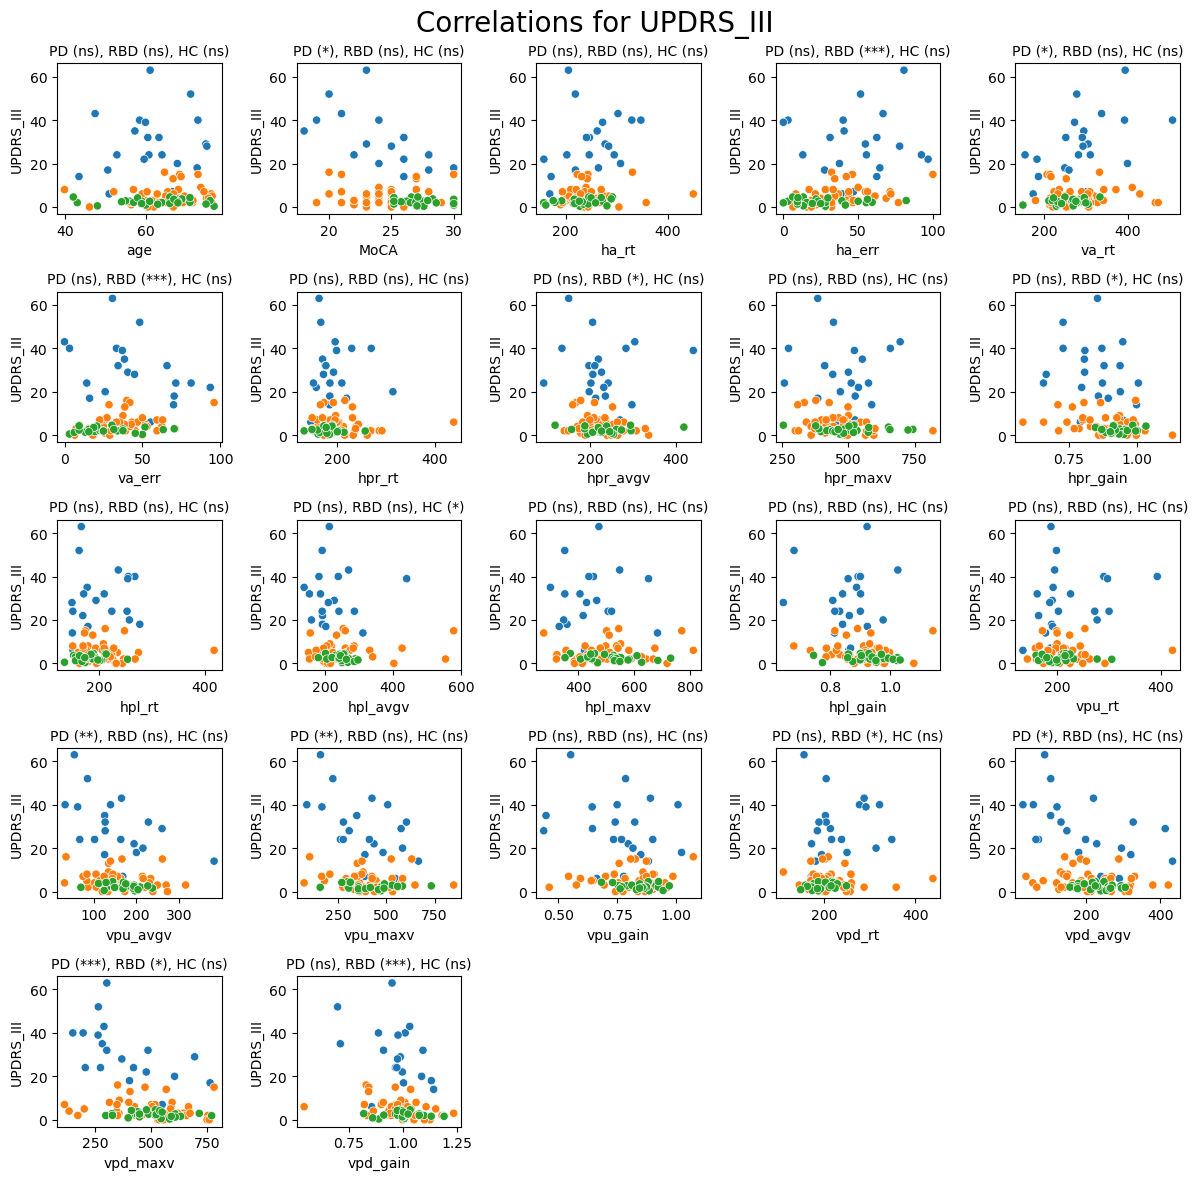

In [7]:
normality_results = mass_sw_test(df)
UPDRS_III_r = compute_correlations(df, 'UPDRS_III', normality_results)  # For MoCA, as example
scatter_plots(df, 'UPDRS_III', UPDRS_III_r)